In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the datset and displaying the 1st 5 rows
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## EDA

In [3]:
##Checking the shape of the dataset
df.shape

(1000, 8)

In [4]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Data Ckecks
1. Missing Values
2. Duplicates
3. Data Types
4. Number of unique values in each and every column
5. Statistics of the dataset
5. Categories in all categorical columns

In [5]:
## Missing valies
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Observation: There are no missing values in the dataset

In [6]:
## Duplicates
df.duplicated().sum()

0

#### Observation: There are no duplicates in the dataset

In [7]:
## Data Types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Observation: There are 5 categorical columns and 3 numerical columnss in the dataset

In [8]:
## number of unique values in the dataset
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
## Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Observations: 
1. Means of all the 3 numerical columns are close to each other
2. Standard deviations are also close to each other
3. Maths has min value 0 followed by writing min score 10 and reading min score of 17


### Exploring Data

In [10]:
num_col = [col for col in df.columns if df[col].dtype!='O']
cat_col = [col for col in df.columns if df[col].dtype=='O']

In [11]:
print('The',len(num_col),'numerical columns are: ',num_col)
print('The',len(cat_col),'categorical columns are: ',cat_col)

The 3 numerical columns are:  ['math score', 'reading score', 'writing score']
The 5 categorical columns are:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
## Best Performance
math_full = df[df['math score']==100]['math score'].count()
writing_full = df[df['writing score']==100]['writing score'].count()
reading_full = df[df['reading score']==100]['reading score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
## Bad Performance
math_bad = df[df['math score']<=20]['math score'].count()
writing_bad = df[df['writing score']<=20]['writing score'].count()
reading_bad = df[df['reading score']<=20]['reading score'].count()

print(f'Number of students with below 20 marks in Maths: {math_bad}')
print(f'Number of students with below 20 marks in Writing: {writing_bad}')
print(f'Number of students with below 20 marks in Reading: {reading_bad}')

Number of students with below 20 marks in Maths: 4
Number of students with below 20 marks in Writing: 3
Number of students with below 20 marks in Reading: 1


#### Observations:
1. The performance of students is best in reading followed by writing and finally maths

### Adding Average and Total columns for a better understanding of performance

In [14]:
df['total'] = df['writing score']+df['reading score']+df['math score']

In [15]:
df['average'] = df['total']/3

In [16]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


## Data Exploration and Visualizations

In [17]:
#Gender column
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

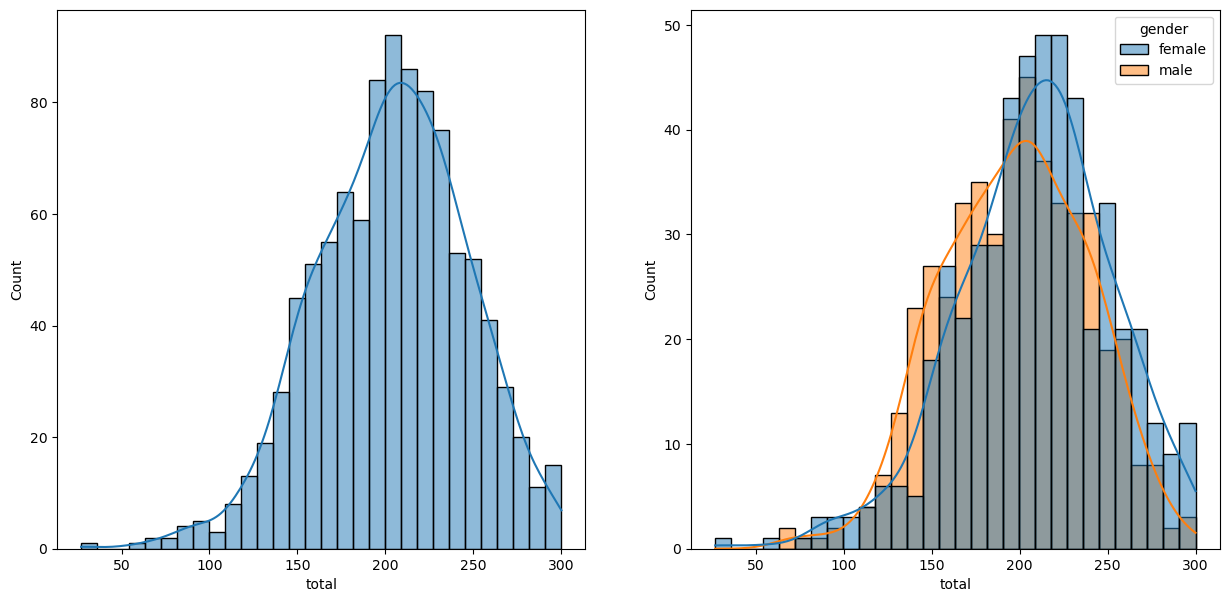

In [18]:
## Gender vs Average column
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(x=df['total'],kde =True,bins=30)
plt.subplot(122)
sns.histplot(x=df['total'],kde=True,bins=30,hue=df['gender'])
plt.show()

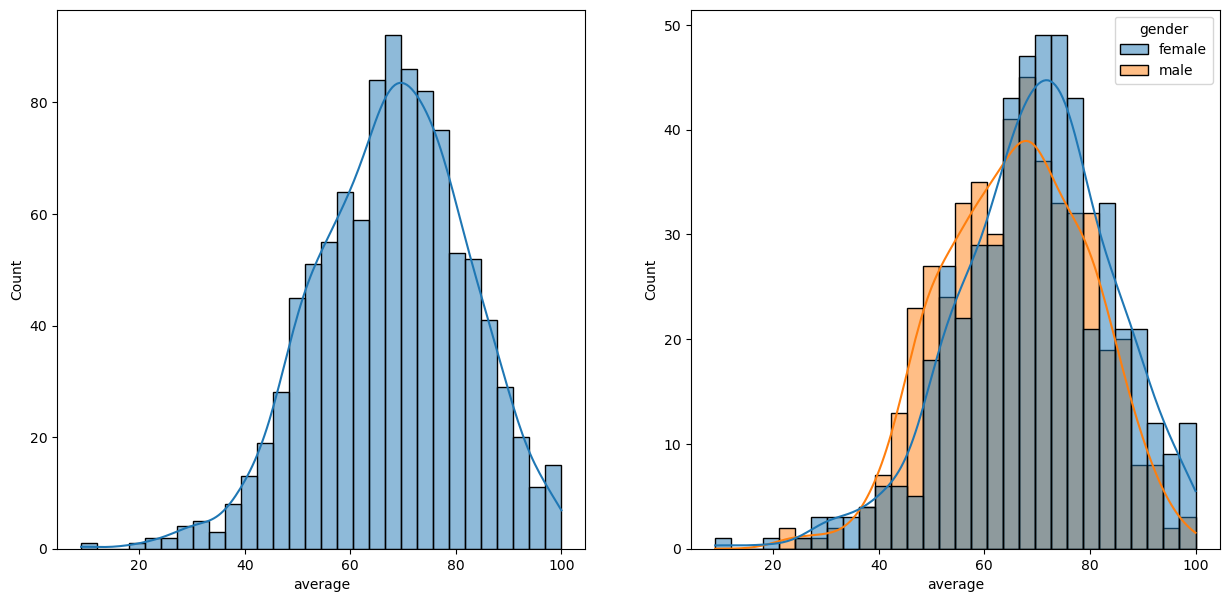

In [19]:
## Gender vs Total column
fig,axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(x=df['average'],kde=True,bins=30)
plt.subplot(122)
sns.histplot(x=df['average'],kde=True,hue=df['gender'],bins=30)
plt.show()

#### Observation:
Females tend to score better than male students

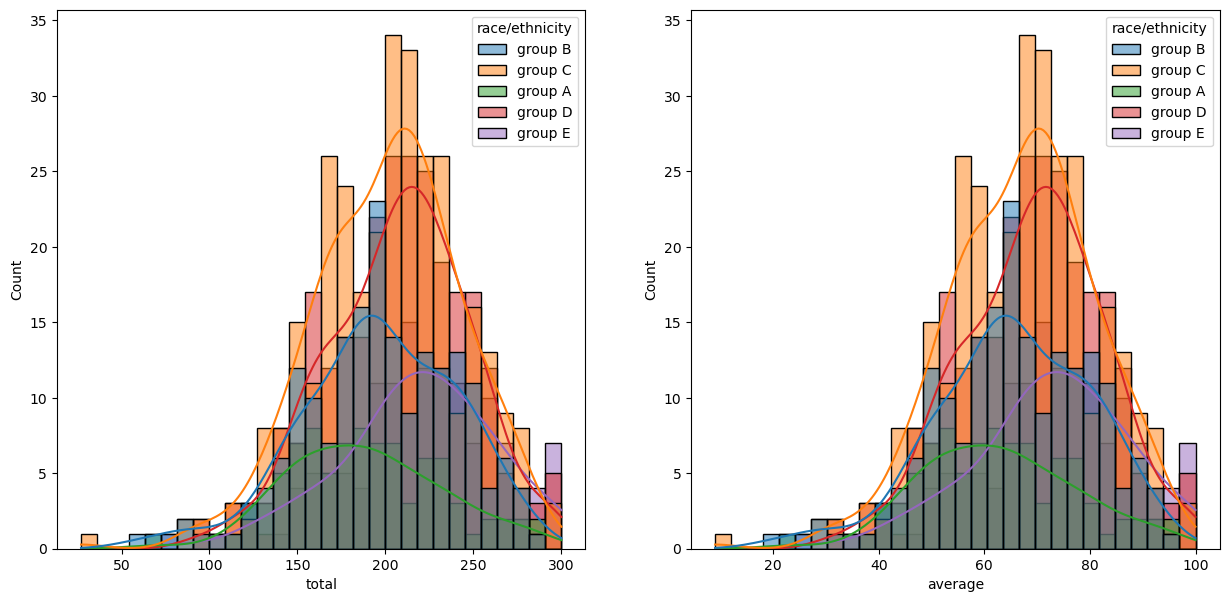

In [20]:
##Race/Ethnicity vs Total and Average
fig,axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(x=df['total'],kde=True,bins=30,hue=df['race/ethnicity'])
plt.subplot(122)
sns.histplot(x=df['average'],kde=True,bins=30,hue=df['race/ethnicity'])
plt.show()

#### Observation
Group E shows a bit better performance compared to other categories

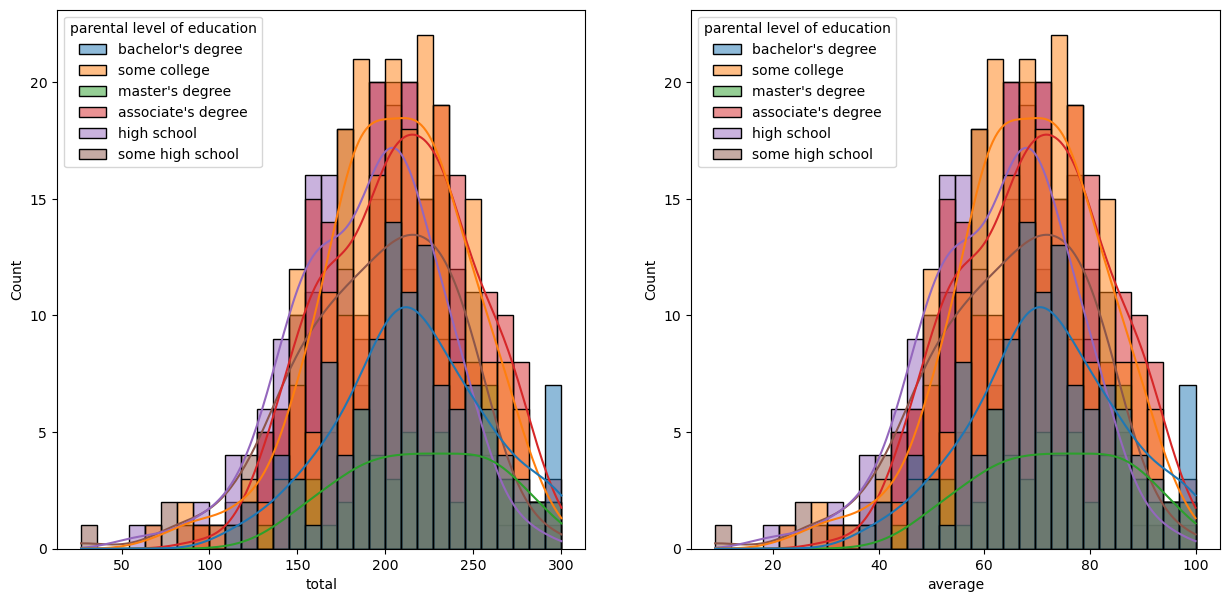

In [21]:
##parental level of education vs Total and Average
fig,axs = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(x=df['total'],kde=True,bins=30,hue=df['parental level of education'])
plt.subplot(122)
sns.histplot(x=df['average'],kde=True,bins=30,hue=df['parental level of education'])
plt.show()

In [22]:
df[df['total']>=290]['parental level of education'].value_counts()

bachelor's degree     8
associate's degree    3
some college          2
master's degree       2
some high school      1
Name: parental level of education, dtype: int64

In [23]:
df.groupby('parental level of education')['total'].mean()

parental level of education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total, dtype: float64

In [24]:
df.groupby('parental level of education')['average'].mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: average, dtype: float64

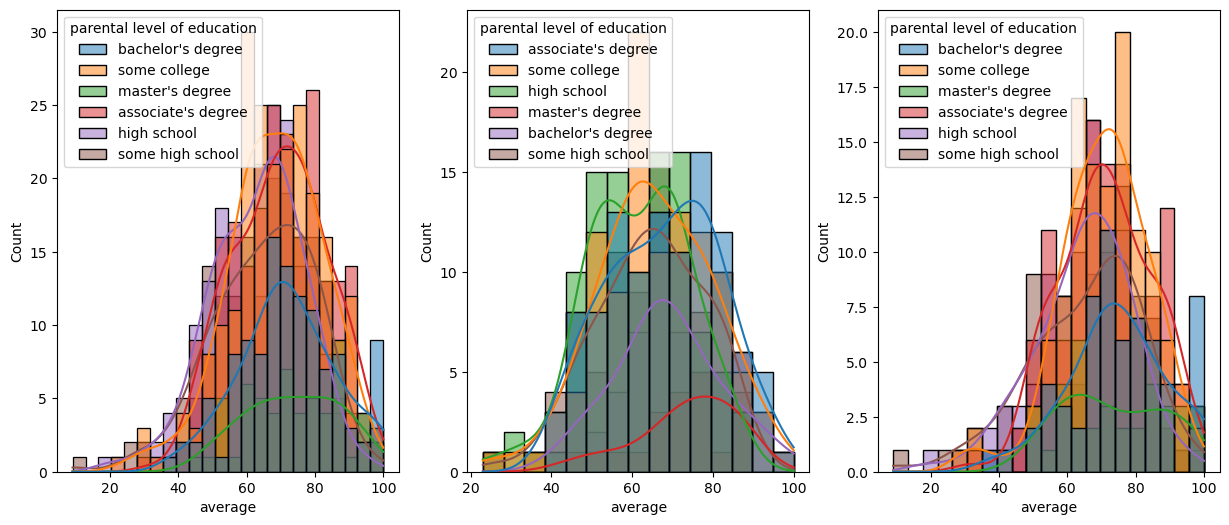

In [25]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Observations:
1. Parental level of educations shos no impact on the average or total of a student
2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3. 3rd plot we can see there is no effect of parent's education on female students.

In [26]:
##Lunch vs Total and Average columns
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

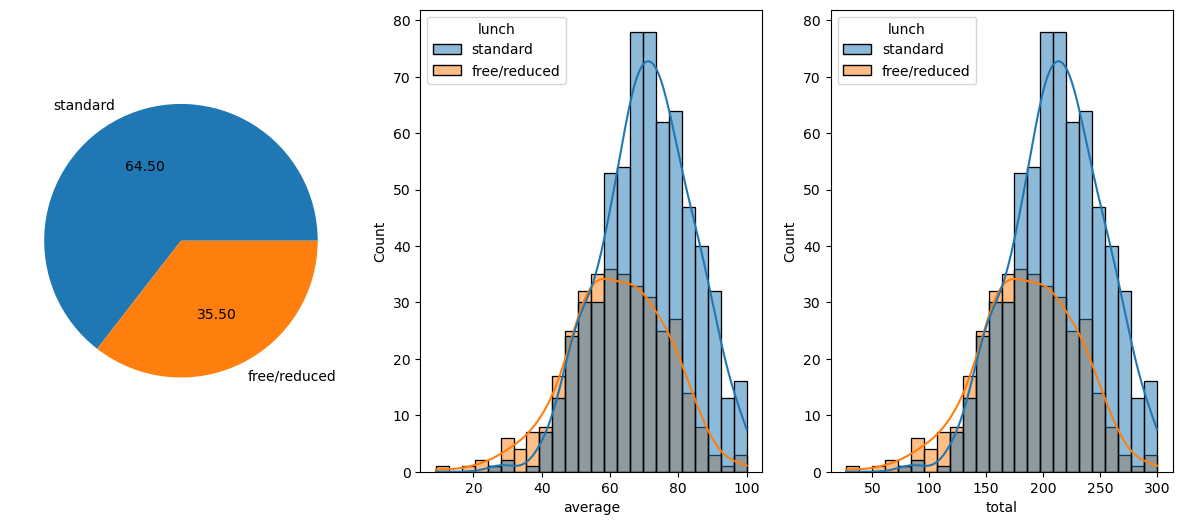

In [37]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
plt.pie(df['lunch'].value_counts(),labels = df['lunch'].value_counts().index,autopct ='%.2f')
plt.subplot(132)
sns.histplot(data =df,x='average',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data =df,x='total',hue='lunch',kde=True)
plt.show()

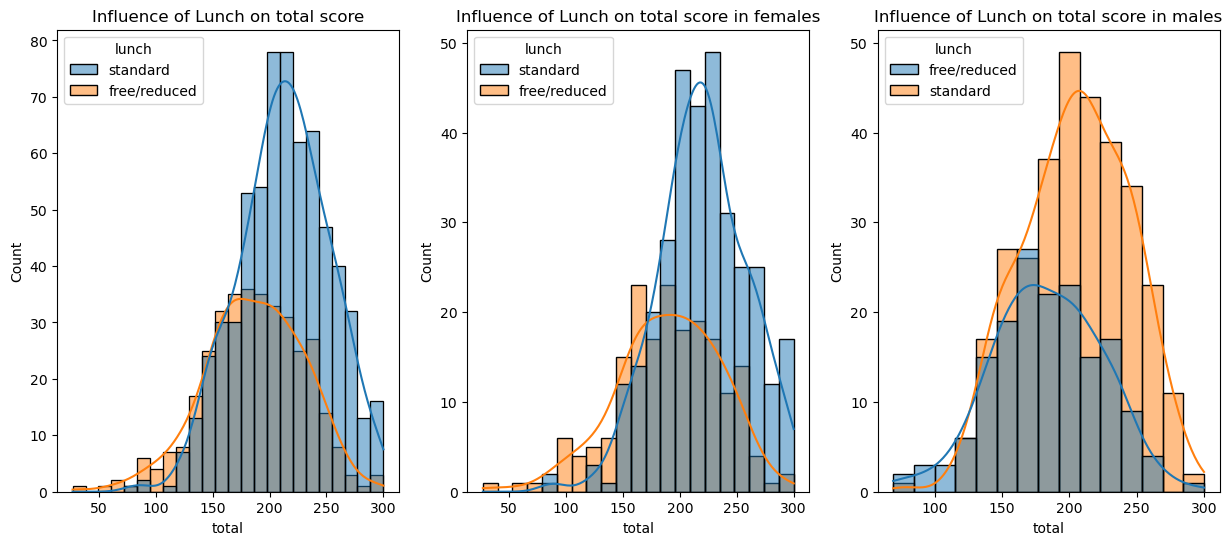

In [39]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
sns.histplot(data =df,x='total',hue='lunch',kde=True)
plt.title('Influence of Lunch on total score')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='female'],x='total',hue='lunch',kde=True)
plt.title('Influence of Lunch on total score in females')
plt.subplot(133)
sns.histplot(data =df[df['gender']=='male'],x='total',hue='lunch',kde=True)
plt.title('Influence of Lunch on total score in males')
plt.show()

In [41]:
#lunch vs parental level of education
df.groupby('lunch')['parental level of education'].value_counts()

lunch         parental level of education
free/reduced  some college                    79
              associate's degree              77
              high school                     70
              some high school                61
              bachelor's degree               44
              master's degree                 24
standard      some college                   147
              associate's degree             145
              high school                    126
              some high school               118
              bachelor's degree               74
              master's degree                 35
Name: parental level of education, dtype: int64

In [42]:
#lunch vs race/ethnicity
df.groupby('lunch')['race/ethnicity'].value_counts()

lunch         race/ethnicity
free/reduced  group C           114
              group D            95
              group B            69
              group E            41
              group A            36
standard      group C           205
              group D           167
              group B           121
              group E            99
              group A            53
Name: race/ethnicity, dtype: int64

#### Observations
1. Students with a standard lunch show much better performance compared to students with free/reduced lunch
2. Lunch column is not being influenced by parental education or race/ethnicity

In [43]:
## test preparation course
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

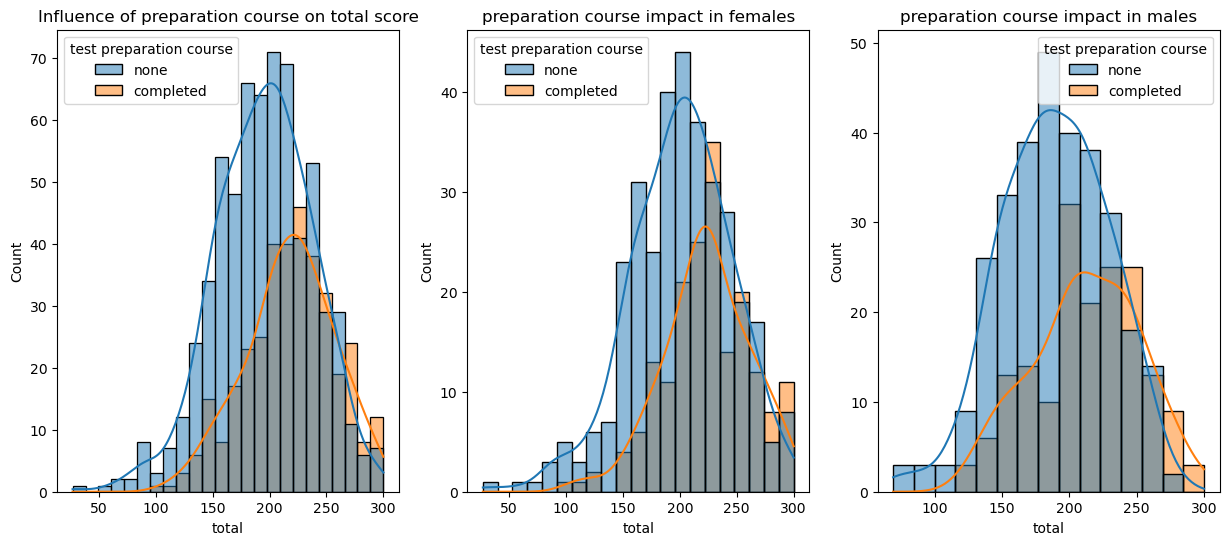

In [46]:
fig,axs = plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
sns.histplot(data =df,x='total',hue='test preparation course',kde=True)
plt.title('Influence of preparation course on total score')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='female'],x='total',hue='test preparation course',kde=True)
plt.title('preparation course impact in females')
plt.subplot(133)
sns.histplot(data =df[df['gender']=='male'],x='total',hue='test preparation course',kde=True)
plt.title('preparation course impact in males')
plt.show()

In [49]:
df[df['test preparation course']=='none']['average'].mean()

65.03894080996888

In [50]:
df[df['test preparation course']=='completed']['average'].mean()

72.66945996275605

In [53]:
df[df['test preparation course']=='none']['total'].mean()

195.11682242990653

In [54]:
df[df['test preparation course']=='completed']['total'].mean()

218.00837988826817

#### Observation
1. Completion of a preparation test shows a positive impact on total final scores
2. Students who have completed prep course score better than those who didn't

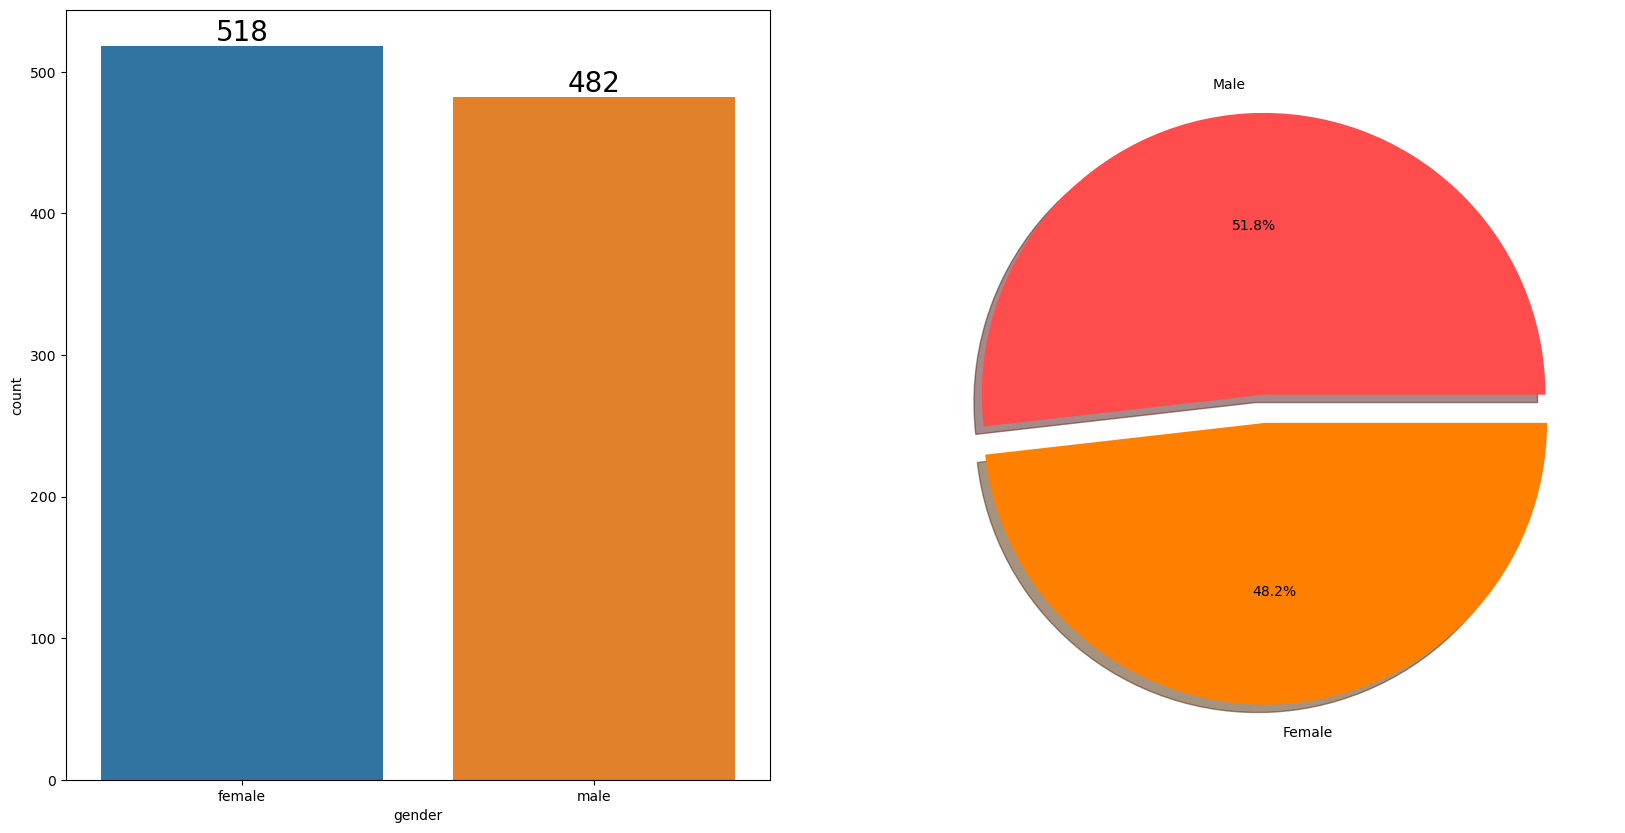

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Checking for outliers

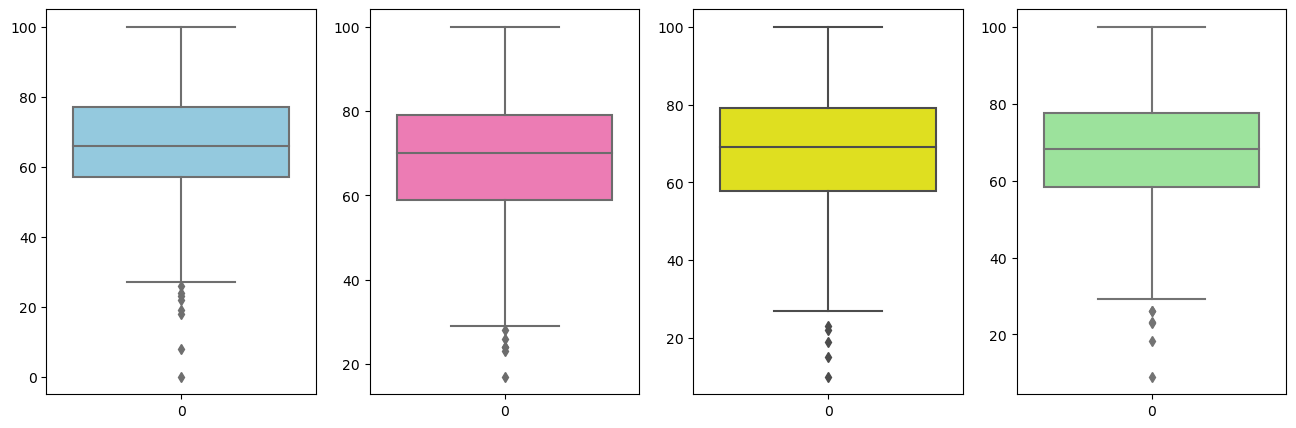

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Observation
1. There are outliers in all the columns

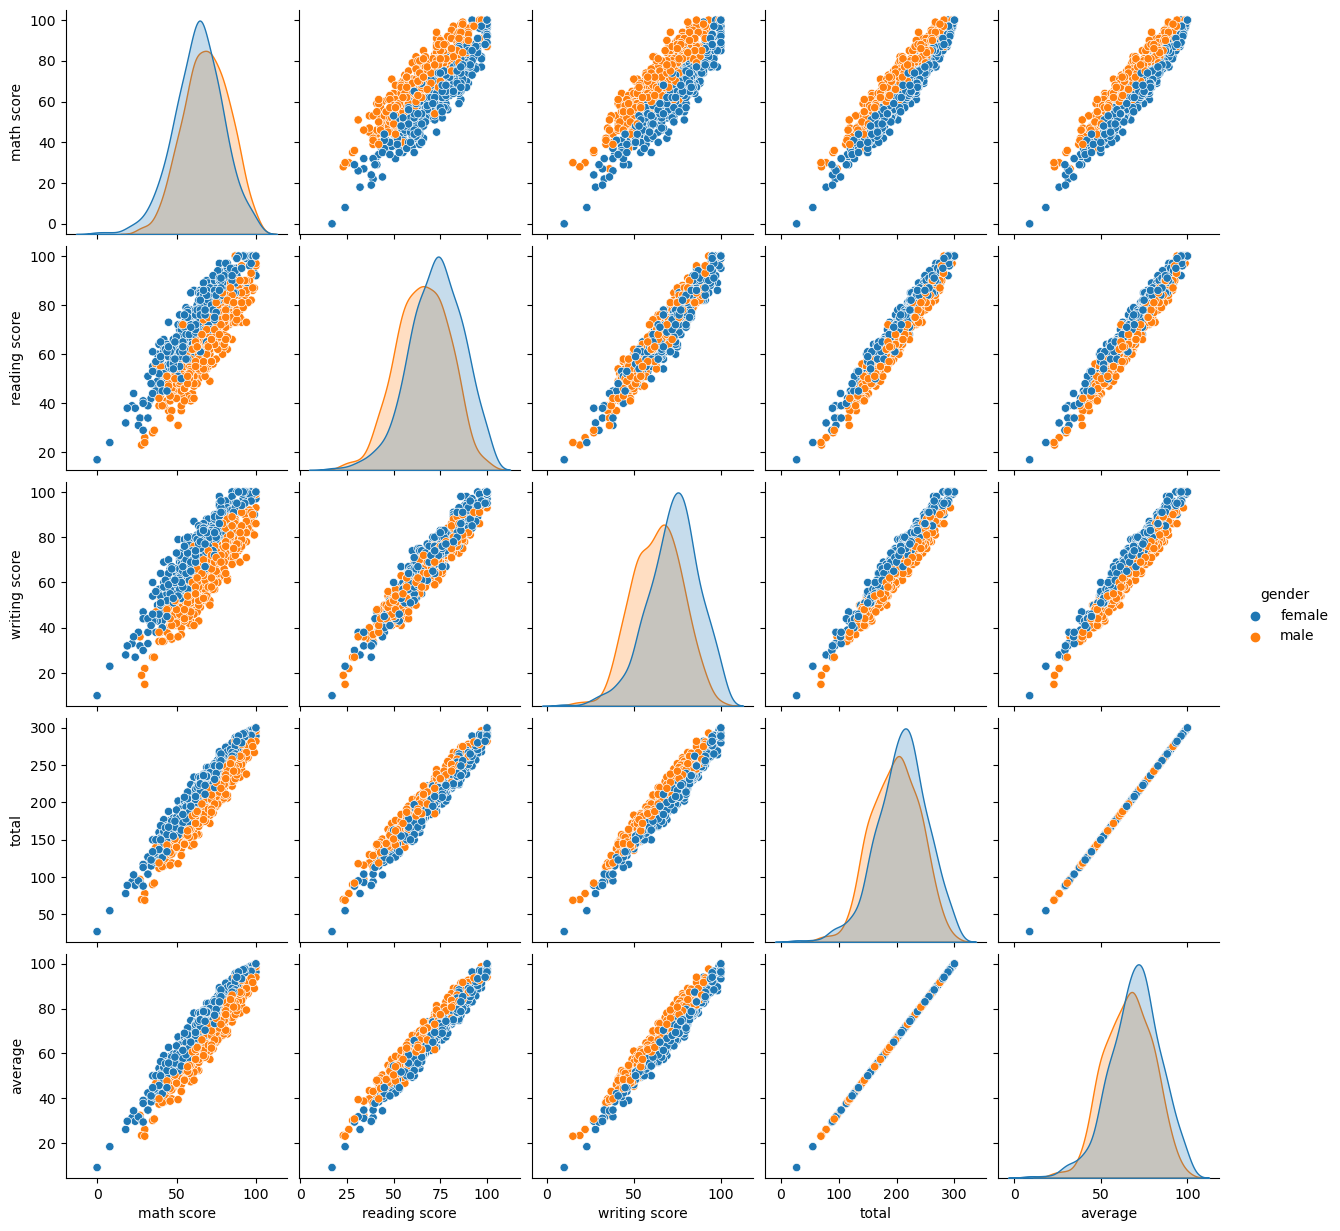

In [75]:
sns.pairplot(df,hue = 'gender')
plt.show()